In [2]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import matplotlib.pyplot as plt #I forget, but probably for plotting... idk
import seaborn as sns #Used for Visualizations of matplotlib

#-- This is the next step.
#from sklearn.impute import SimpleImputer # used for handling missing data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
#from sklearn.model_selection import train_test_split # used for splitting training and testing data
#from sklearn.preprocessing import StandardScaler # used for feature scaling

In [3]:
df = pd.read_excel('nijfull.xlsx')

In [18]:
print(f'The length of the dataframe is {len(df)} rows and {len(df.columns)} columns.')

The length of the dataframe is 25835 rows and 34


In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        #types to string
        types = df.dtypes
        types.replace({'object': 'str'}, inplace = True)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,types], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2 : 'type'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n")
        #Plotting
        plt.figure(figsize=(13,6))
        sns.set(style="whitegrid", color_codes=True)
        sns.barplot(x = mis_val_table_ren_columns.index, y = mis_val_table_ren_columns["% of Total Values"], data=mis_val_table_ren_columns)
        plt.xticks(rotation = 90)
        plt.title("Missing values count")
        plt.show()
        #return the missing data
        return mis_val_table_ren_columns

Your selected dataframe has 54 columns.



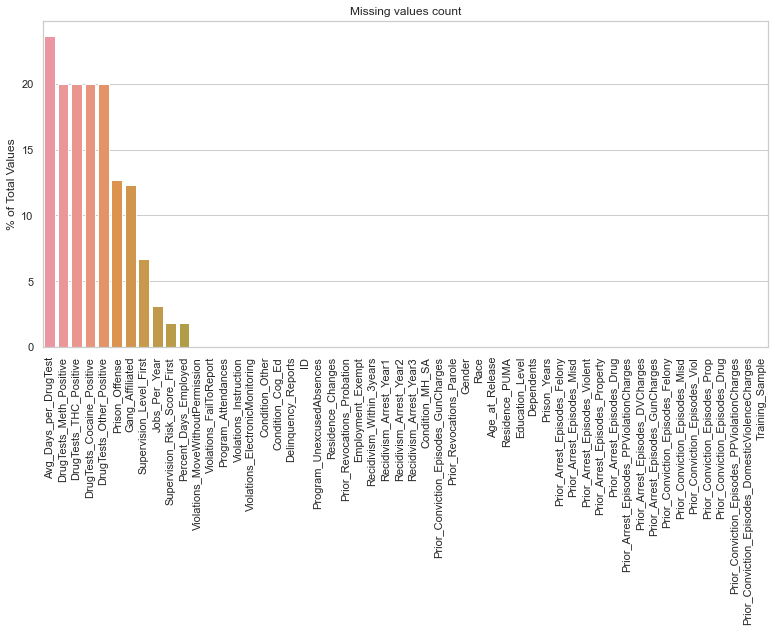

,Missing Values,% of Total Values,type
Avg_Days_per_DrugTest,6103,23.6,float64
DrugTests_Meth_Positive,5172,20.0,float64
DrugTests_THC_Positive,5172,20.0,float64
DrugTests_Cocaine_Positive,5172,20.0,float64
DrugTests_Other_Positive,5172,20.0,float64
Prison_Offense,3277,12.7,str
Gang_Affiliated,3167,12.3,float64
Supervision_Level_First,1720,6.7,str
Jobs_Per_Year,808,3.1,float64
Supervision_Risk_Score_First,475,1.8,float64


In [6]:
missing_values_table(df)

In [7]:
### Honestly, can do this by just building a list of the columns based on x/y reasoning and leave them out.
#Drop for now. If useful, we can bring back in.
df.drop('Violations_ElectronicMonitoring', axis=1, inplace=True)
df.drop('Violations_FailToReport', axis=1, inplace=True)
df.drop('Prior_Conviction_Episodes_DomesticViolenceCharges', axis=1, inplace=True)
df.drop('Prior_Revocations_Parole', axis=1, inplace=True)
df.drop('Recidivism_Arrest_Year3', axis=1, inplace=True)
df.drop('Violations_MoveWithoutPermission', axis=1, inplace=True)
df.drop('Employment_Exempt', axis=1, inplace=True)
df.drop('Prior_Conviction_Episodes_GunCharges', axis=1, inplace=True)
df.drop('Prior_Revocations_Probation', axis=1, inplace=True)
df.drop('Gang_Affiliated', axis=1, inplace=True)
df.drop('Prior_Arrest_Episodes_DVCharges', axis=1, inplace=True)
df.drop('Violations_Instruction', axis=1, inplace=True)
df.drop('Recidivism_Arrest_Year2', axis=1, inplace=True)
df.drop('Prior_Arrest_Episodes_GunCharges', axis=1, inplace=True)
df.drop('Recidivism_Arrest_Year1', axis=1, inplace=True)
df.drop('Condition_Other', axis=1, inplace=True)
df.drop('Prior_Conviction_Episodes_Viol', axis=1, inplace=True)
df.drop('Prior_Conviction_Episodes_PPViolationCharges', axis=1, inplace=True)
df.drop('Condition_Cog_Ed', axis=1, inplace=True)
df.drop('Avg_Days_per_DrugTest', axis=1, inplace=True)

<AxesSubplot:>

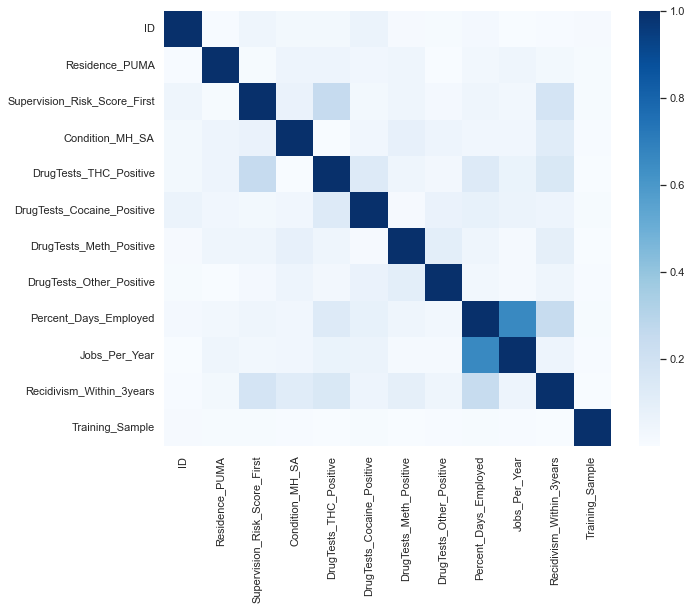

In [8]:
#Another visualization
corr = df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap="Blues")

In [9]:
## Since this is categorical data with 6.7% of the values missing the best options available are to fill missing data with the mean data and unknown.
#Change values of Supervision_Level_First and Prison_Offense to N/A.
df['Supervision_Level_First'].fillna('unknown',inplace=True)
df['Prison_Offense'].fillna('unknown',inplace=True)

In [10]:
###Definitely can loop this, more likely add into a function call later.
#From here on we are averaging out the missing data of the following rows.
df['Recidivism_Within_3years'].fillna(df['Recidivism_Within_3years'].mean(),inplace=True)
df['Condition_MH_SA'].fillna(df['Condition_MH_SA'].mean(),inplace=True)
df['DrugTests_THC_Positive'].fillna(df['DrugTests_THC_Positive'].mean(),inplace=True)
df['DrugTests_Cocaine_Positive'].fillna(df['DrugTests_Cocaine_Positive'].mean(),inplace=True)
df['DrugTests_Meth_Positive'].fillna(df['DrugTests_Meth_Positive'].mean(),inplace=True)
df['DrugTests_Other_Positive'].fillna(df['DrugTests_Other_Positive'].mean(),inplace=True)
df['Jobs_Per_Year'].fillna(df['Jobs_Per_Year'].mean(),inplace=True)
df['Supervision_Risk_Score_First'].fillna(df['Supervision_Risk_Score_First'].mean(),inplace=True)
df['Percent_Days_Employed'].fillna(df['Percent_Days_Employed'].mean(),inplace=True)

In [11]:
#Check to see if there is any missing data.
df.isna().sum()

ID                                          0
Gender                                      0
Race                                        0
Age_at_Release                              0
Residence_PUMA                              0
Supervision_Risk_Score_First                0
Supervision_Level_First                     0
Education_Level                             0
Dependents                                  0
Prison_Offense                              0
Prison_Years                                0
Prior_Arrest_Episodes_Felony                0
Prior_Arrest_Episodes_Misd                  0
Prior_Arrest_Episodes_Violent               0
Prior_Arrest_Episodes_Property              0
Prior_Arrest_Episodes_Drug                  0
Prior_Arrest_Episodes_PPViolationCharges    0
Prior_Conviction_Episodes_Felony            0
Prior_Conviction_Episodes_Misd              0
Prior_Conviction_Episodes_Prop              0
Prior_Conviction_Episodes_Drug              0
Condition_MH_SA                   

In [12]:
#Break the dataframe down in readable columns (124) to complete preprocessing and ready for analysis.
df1 = pd.get_dummies(df)

In [13]:
df1

,ID,Residence_PUMA,Supervision_Risk_Score_First,Condition_MH_SA,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,...,Program_Attendances_9,Program_Attendances_10 or more,Program_UnexcusedAbsences_0,Program_UnexcusedAbsences_1,Program_UnexcusedAbsences_2,Program_UnexcusedAbsences_3 or more,Residence_Changes_0,Residence_Changes_1,Residence_Changes_2,Residence_Changes_3 or more
0,1,16,3.0,True,0.000000,0.000000,0.000000,0.00000,0.488562,0.447610,...,0,0,1,0,0,0,0,0,1,0
1,2,16,6.0,False,0.000000,0.000000,0.000000,0.00000,0.425234,2.000000,...,0,0,1,0,0,0,0,0,1,0
2,3,24,7.0,True,0.333333,0.000000,0.166667,0.00000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0,0
3,4,16,7.0,True,0.000000,0.000000,0.000000,0.00000,1.000000,0.718996,...,0,0,1,0,0,0,0,0,0,1
4,5,16,4.0,True,0.000000,0.000000,0.058824,0.00000,0.203562,0.929389,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,26756,9,5.0,False,0.000000,0.000000,0.000000,0.00000,0.189507,0.572044,...,0,0,1,0,0,0,1,0,0,0
25831,26758,25,5.0,False,0.000000,0.000000,0.000000,0.00000,0.757098,0.576104,...,0,1,1,0,0,0,1,0,0,0
25832,26759,15,5.0,False,0.063350,0.013741,0.012890,0.00755,0.711138,0.894125,...,0,0,1,0,0,0,0,1,0,0
25833,26760,15,5.0,False,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0,0
